# Question 6

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Part (a): Data Simulation

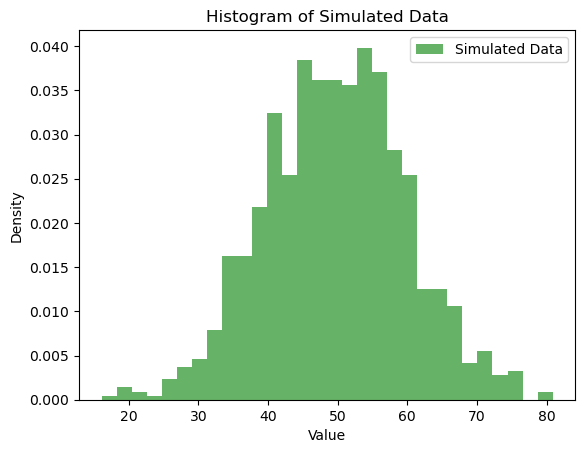

In [3]:
mu, sigma = 50, 10
data = np.random.normal(mu, sigma, 1000)

plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Simulated Data')
plt.title('Histogram of Simulated Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Part (b): Normal Distribution Fitting

Estimated Mean (MLE): 49.74
Estimated Standard Deviation (MLE): 10.14


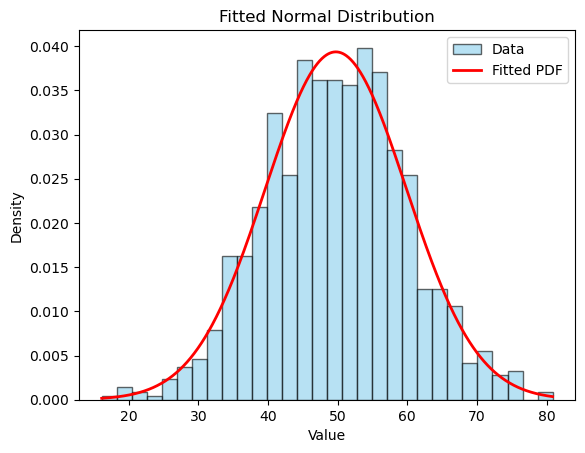

In [5]:
# Estimating the parameters using MLE
mu_est, sigma_est = norm.fit(data)
print(f"Estimated Mean (MLE): {mu_est:.2f}")
print(f"Estimated Standard Deviation (MLE): {sigma_est:.2f}")

x = np.linspace(data.min(), data.max(), 1000)
pdf = norm.pdf(x, mu_est, sigma_est)

plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Data')
plt.plot(x, pdf, 'r-', linewidth=2, label='Fitted PDF')
plt.title("Fitted Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

## Part (c): Outliers Data Simulation

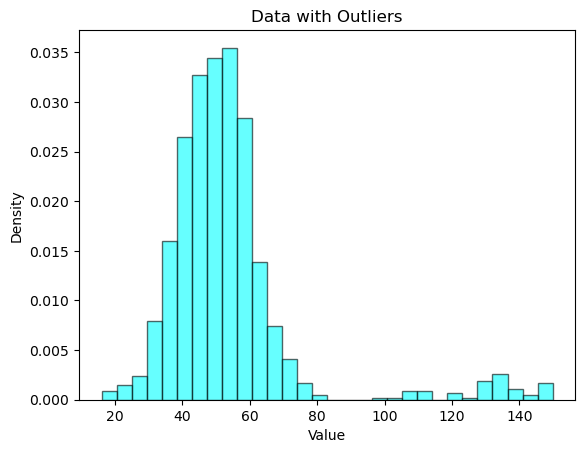

In [11]:
# Generating 50 random outliers from distribution Uniform(100, 150)
outliers = np.random.uniform(100, 150, 50)

# Combining outlier data with original data
data_with_outliers = np.concatenate([data, outliers])

plt.hist(data_with_outliers, bins=30, density=True, alpha=0.6, color='cyan', edgecolor='black')
plt.title("Data with Outliers")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

## Normal Distribution Fitting to Data with Outliers

Estimated Mean (MLE)(with outliers): 53.58
Estimated Standard Deviation (MLE)(with outliers): 20.03


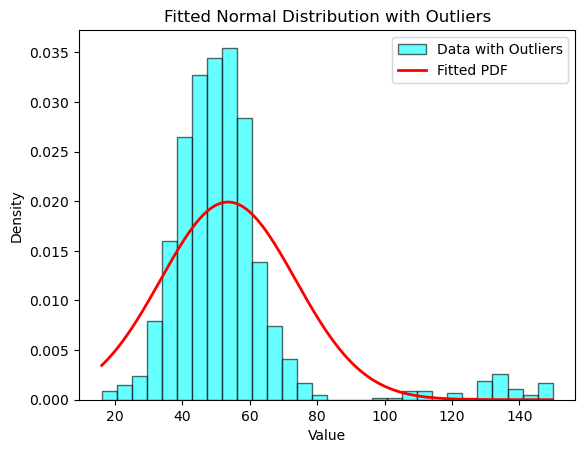

In [13]:
mu_outliers, sigma_outliers = norm.fit(data_with_outliers)
print(f"Estimated Mean (MLE)(with outliers): {mu_outliers:.2f}")
print(f"Estimated Standard Deviation (MLE)(with outliers): {sigma_outliers:.2f}")

x_outliers = np.linspace(data_with_outliers.min(), data_with_outliers.max(), 1000)
pdf_outliers = norm.pdf(x_outliers, mu_outliers, sigma_outliers)

plt.hist(data_with_outliers, bins=30, density=True, alpha=0.6, color='cyan', edgecolor='black', label='Data with Outliers')
plt.plot(x_outliers, pdf_outliers, 'r-', linewidth=2, label='Fitted PDF')
plt.title("Fitted Normal Distribution with Outliers")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

## Comparison of Parameters

In [17]:
print("\nParameter Comparison:")
print(f"Original Data: Mean = {mu_est:.2f}, Standard Deviation = {sigma_est:.2f}")
print(f"With Outliers: Mean = {mu_outliers:.2f}, Standard Deviation = {sigma_outliers:.2f}")


Parameter Comparison:
Original Data: Mean = 49.74, Standard Deviation = 10.14
With Outliers: Mean = 53.58, Standard Deviation = 20.03


Now, since we are fitting our data to a Normal Distribution, we know that using the Z-Score Test, all points with a z-value > 3 can be considered outliers as only 0.1 of the data points will have a Z-Score > 3. Then, we can use the following:

In [16]:
z_scores = (data_with_outliers - np.mean(data_with_outliers)) / np.std(data_with_outliers)
outlier_mask = np.abs(z_scores) > 3  
detected_outliers = data_with_outliers[outlier_mask]

print("\nDetected Outliers (Z-score > 3):")
print(detected_outliers)


Detected Outliers (Z-score > 3):
[128.15016584 146.8013348  147.1915499  131.42545552 136.39198259
 129.35105985 135.15186365 147.97259003 147.41388514 125.20867886
 120.59243403 140.95950009 136.00771871 136.42661497 136.31492454
 120.46425759 132.75638016 146.88880089 131.37773077 132.85944391
 128.34756837 134.53709065 131.88596716 131.90617937 135.81359378
 139.1163164  130.75153533 128.36444647 148.49782347 119.45998831
 133.28317044 140.42770738 137.64880613 134.34457212 149.8272531
 136.96523424 143.44868202 135.37249986 147.21787094 140.73754595]
